# Pipeline

Diagnosis -> Clean_1_regex -> Normalize -> Clean_2_sw -> Create_Vocab -> Clean_Vocab -> Vectorize -> Modeling
_____

Next steps:

__Challenges:__
* Include new functions in the preprocessing_custom file
* Follow coursera course
* Thems based on regular expressions -- I already have a function that does it -- refactoring it
_____

__Semantic challenges: Look for regex patterns:__ 
* Is that possible to search for word patterns using regular expressions? Such as upper case words?
* Include new features not only based on regex, such as: number of words, len of words, n characters, len characters, etc.


____ 

__Tutorials__:

* Text processing pipeline: https://www.tutorialspoint.com/python_text_processing/python_text_processing_environment.htm

* AI Pipeline: https://www.tutorialspoint.com/artificial_intelligence_with_python/index.htm


Regex material:
* https://towardsdatascience.com/nlp-basics-understanding-regular-expressions-fc7c7746bc70#:~:text=Simply%20put%2C%20a%20regular%20expression,specify%20a%20disjunction%20of%20characters.

* https://web.stanford.edu/~jurafsky/slp3/2.pdf
* https://www.regular-expressions.info/replacecase.html#:~:text=In%20the%20regex%20%5CU%5Cw,is%20not%20a%20word%20character.

# Semantic
Test strings and regex dictionary

In [1]:
import pandas as pd
import numpy as np

In [2]:
# test data
## include string
## include list of strings
## include regex dict

import re
import string

s = 'result results resulted resulting run UPPER CASE @you running ran No #results  😺 😺 😺@results FOUND. View all teams. MAD Prod Fundraistrick. 350 10th Ave, Suite 1100. San Diego, CA 92101 US. Back to top. Donor Support braistrick@stayclassy.org'
s1 = 'No results results found. View all teams. Prod Fundraistrick. 350 10th Ave, Suite 1100. San Diego, CA 92101 US. Back to top. Donor Support braistrick@stayclassy.org. http://localhost:8888/notebooks/nlp/cleaning_sandbox.ipynb https://www.w3schools.com/python/python_regex.asp'
s2 = 'https://www.w3schools.com/python/python_regex.asp No results results found. View all teams. Prod Fundraistrick. 350 10th Ave, Suite 1100. San Diego, CA 92101 US. Back to top. Donor Support braistrick@stayclassy.org. http://localhost:8888/notebooks/nlp/cleaning_sandbox.ipynb'
s3 = 'No results results found. View all teams. Prod Fundraistrick. 350 10th Ave, Suite 1100. San Diego, CA 92101 US. Back to top. Donor Support braistrick@stayclassy.org. http://localhost:8888/notebooks/nlp/cleaning_sandbox.ipynb'
s4 = 'results results found view teams prod fundraistrick ave suite san diego back top donor support'
list_of_strings = [s, s1, s2, s3, s4]

dict_regex = {
    'hashtags': r'#(\w+)',
    # returns not only mentions, but
    # part of the email after the @
    'mentions': r'@(\w+)',
    'emails': r'',
    'links': r'https?:\/\/.*[\r\n]*',
    'remove_RT': '^RT[\s]+',
    'numbers': r'\d+',
    'symbols': r'',
    'punctionation2': '[^\w\s]',
    'punctionation': '[%s]' % re.escape(string.punctuation),
    'periods': '\.',
    'exclamation points': '\!',
    'question marks': '\?',
    'upper case words': '[A-Z][A-Z\d]+',
    # https://stackoverflow.com/questions/39536390/match-unicode-emoji-in-python-regex
    'emojis': '\d+(.*?)[\u263a-\U0001f645]',
    'emojis_work': "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']",
    'upper case': '[A-Z][A-Z\d]+'
}

list_of_regex_values = list(dict_regex.values())
list_of_regex_keys = list(dict_regex.keys())

list_regex = ['😺', '😺 😺', '😺 😺 😺', 'prod', 'results', 'suite', ' ']



# Test support functions

## Test string functions

In [3]:
from pre_processing_text.s_string_regex import re_match_string
from pre_processing_text.s_string_regex import re_count_match_string
from pre_processing_text.s_string_regex import re_sub_match_string

In [4]:
re_match_string(s, list_of_regex_values[1])

['you', 'results', 'stayclassy']

In [5]:
re_count_match_string(s, list_of_regex_values[1])

3

In [6]:
re_sub_match_string(s, list_of_regex_values[1])

'result results resulted resulting run upper case running ran no #results 😺 😺 😺 found. view all teams. mad prod fundraistrick. 350 10th ave, suite 1100. san diego, ca 92101 us. back to top. donor support braistrick.org'

## Test list function

In [7]:
from pre_processing_text.s_list_regex import func_re_list_strings
from pre_processing_text.s_list_regex import n_re_matches_list_strings
from pre_processing_text.s_list_format_pd import list_to_df

In [8]:
func_re_list_strings(re_count_match_string, 
                     list_of_strings, 
                     list_of_regex_values[0])

[1, 0, 0, 0, 0]

In [9]:
# iterate through a list of regex over a list of strings
t = n_re_matches_list_strings(
    re_match_string,
    list_of_strings,
    dict_regex
                         )

In [10]:
list_to_df(t, list_of_regex_keys)

,count_hashtags,count_mentions,count_emails,count_links,count_remove_RT,count_numbers,count_symbols,count_punctionation2,count_punctionation,count_periods,count_exclamation points,count_question marks,count_upper case words,count_emojis,count_emojis_work,count_upper case
0,[results],"[you, results, stayclassy]","[, , , , , , , , , , , , , , , , , , , , , , ,...",[],[],"[350, 10, 1100, 92101]","[, , , , , , , , , , , , , , , , , , , , , , ,...","[@, #, 😺, 😺, 😺, @, ., ., ., ,, ., ,, ., ., @, .]","[@, #, @, ., ., ., ,, ., ,, ., ., @, .]","[., ., ., ., ., ., .]",[],[],"[UPPER, CASE, FOUND, MAD, CA, US]",[],"[😺, 😺, 😺]","[UPPER, CASE, FOUND, MAD, CA, US]"
1,[],[stayclassy],"[, , , , , , , , , , , , , , , , , , , , , , ,...",[http://localhost:8888/notebooks/nlp/cleaning_...,[],"[350, 10, 1100, 92101, 8888, 3]","[, , , , , , , , , , , , , , , , , , , , , , ,...","[., ., ., ,, ., ,, ., ., @, ., ., :, /, /, :, ...","[., ., ., ,, ., ,, ., ., @, ., ., :, /, /, :, ...","[., ., ., ., ., ., ., ., ., ., ., .]",[],[],"[CA, US]",[],[],"[CA, US]"
2,[],[stayclassy],"[, , , , , , , , , , , , , , , , , , , , , , ,...",[https://www.w3schools.com/python/python_regex...,[],"[3, 350, 10, 1100, 92101, 8888]","[, , , , , , , , , , , , , , , , , , , , , , ,...","[:, /, /, ., ., /, /, ., ., ., ., ,, ., ,, ., ...","[:, /, /, ., ., /, /, _, ., ., ., ., ,, ., ,, ...","[., ., ., ., ., ., ., ., ., ., ., .]",[],[],"[CA, US]",[],[],"[CA, US]"
3,[],[stayclassy],"[, , , , , , , , , , , , , , , , , , , , , , ,...",[http://localhost:8888/notebooks/nlp/cleaning_...,[],"[350, 10, 1100, 92101, 8888]","[, , , , , , , , , , , , , , , , , , , , , , ,...","[., ., ., ,, ., ,, ., ., @, ., ., :, /, /, :, ...","[., ., ., ,, ., ,, ., ., @, ., ., :, /, /, :, ...","[., ., ., ., ., ., ., ., .]",[],[],"[CA, US]",[],[],"[CA, US]"
4,[],[],"[, , , , , , , , , , , , , , , , , , , , , , ,...",[],[],[],"[, , , , , , , , , , , , , , , , , , , , , , ,...",[],[],[],[],[],[],[],[],[]


# Diagnoses: count and return the occurrences

In [11]:
from pre_processing_text.view_list_count_regex import df_count_regex_matches
from pre_processing_text.view_list_count_regex import df_matches

from pre_processing_text.clean_list_regex import sub_list_strings_list_regex

In [12]:
# count the number of regex
df_count_regex_matches(list_of_strings, dict_regex)

,count_hashtags,count_mentions,count_emails,count_links,count_remove_RT,count_numbers,count_symbols,count_punctionation2,count_punctionation,count_periods,count_exclamation points,count_question marks,count_upper case words,count_emojis,count_emojis_work,count_upper case
0,1,3,243,0,0,4,243,16,13,7,0,0,6,0,3,6
1,0,1,275,1,0,6,275,27,29,12,0,0,2,0,0,2
2,0,1,275,1,0,6,275,27,29,12,0,0,2,0,0,2
3,0,1,225,1,0,5,225,19,20,9,0,0,2,0,0,2
4,0,0,95,0,0,0,95,0,0,0,0,0,0,0,0,0


In [13]:
# return the identified patterns
df_matches(list_of_strings, dict_regex)

,count_hashtags,count_mentions,count_links,count_emails,count_emojis
0,[results],"[you, results, stayclassy]",[],"[, , , , , , , , , , , , , , , , , , , , , , ,...",[]
1,[],[stayclassy],[http://localhost:8888/notebooks/nlp/cleaning_...,"[, , , , , , , , , , , , , , , , , , , , , , ,...",[]
2,[],[stayclassy],[https://www.w3schools.com/python/python_regex...,"[, , , , , , , , , , , , , , , , , , , , , , ,...",[]
3,[],[stayclassy],[http://localhost:8888/notebooks/nlp/cleaning_...,"[, , , , , , , , , , , , , , , , , , , , , , ,...",[]
4,[],[],[],"[, , , , , , , , , , , , , , , , , , , , , , ,...",[]


# Preprocessing

## Step by step

### Cleaning regex

In [14]:
# clean a list of strings, based on a list of regex
list_cleaned = sub_list_strings_list_regex(list_of_strings, list_of_regex_values)
list_cleaned

['result results resulted resulting run upper case running ran no found view all teams mad prod fundraistrick th ave suite san diego ca us back to top donor support braistrickorg',
 'no results results found view all teams prod fundraistrick th ave suite san diego ca us back to top donor support braistrickorg',
 '',
 'no results results found view all teams prod fundraistrick th ave suite san diego ca us back to top donor support braistrickorg',
 'results results found view teams prod fundraistrick ave suite san diego back top donor support']

In [15]:
serie = pd.Series(list_cleaned)

In [16]:
s_clean = list_cleaned[0]

### Lemmatization (normalization)

In [17]:
from pre_processing_text.norm_lemmatize import lemmatize_list, lemmatize_string

In [18]:
s_lemma = lemmatize_string(s_clean)
s_lemma

'result result result result run upper case run run no find view all team mad prod fundraistrick th ave suite san diego ca us back to top donor support braistrickorg '

In [19]:
list_lemmatized = list(map(lemmatize_string, list_cleaned))
list_lemmatized

['result result result result run upper case run run no find view all team mad prod fundraistrick th ave suite san diego ca us back to top donor support braistrickorg ',
 'no result result find view all team prod fundraistrick th ave suite san diego ca us back to top donor support braistrickorg ',
 '',
 'no result result find view all team prod fundraistrick th ave suite san diego ca us back to top donor support braistrickorg ',
 'result result find view team prod fundraistrick ave suite san diego back top donor support ']

In [20]:
list_of_lemmas = lemmatize_list(list_cleaned)
list_of_lemmas

['result result result result run upper case run run no find view all team mad prod fundraistrick th ave suite san diego ca us back to top donor support braistrickorg ',
 'no result result find view all team prod fundraistrick th ave suite san diego ca us back to top donor support braistrickorg ',
 '',
 'no result result find view all team prod fundraistrick th ave suite san diego ca us back to top donor support braistrickorg ',
 'result result find view team prod fundraistrick ave suite san diego back top donor support ']

In [21]:
serie.apply(lemmatize_string)

0    result result result result run upper case run...
1    no result result find view all team prod fundr...
2                                                     
3    no result result find view all team prod fundr...
4    result result find view team prod fundraistric...
dtype: object

### Cleaning stopwords

In [22]:
from pre_processing_text.clean_list_stopwords import remove_stopwords_list, remove_stopwords_string

In [23]:
stopwords = ['fundraistrick', 'all', 'to', 'th']

In [24]:
remove_stopwords_string(s_lemma, stopwords)

'result result result result run upper case run run no find view team mad prod ave suite san diego ca us back top donor support braistrickorg'

In [25]:
clean_lists_sw = remove_stopwords_list(list_of_lemmas, stopwords)
clean_lists_sw

['result result result result run upper case run run no find view team mad prod ave suite san diego ca us back top donor support braistrickorg',
 'no result result find view team prod ave suite san diego ca us back top donor support braistrickorg',
 '',
 'no result result find view team prod ave suite san diego ca us back top donor support braistrickorg',
 'result result find view team prod ave suite san diego back top donor support']

## Preprocessing unified

In [26]:
from pre_processing_text.preprocess_string_list import preprocessing_list

In [27]:
preprocessed_list = preprocessing_list(list_of_strings, list_of_regex_values, stopwords)
preprocessed_list

['result result result result upper case view team mad prod fundraistrick ave suite san diego donor support braistrickorg',
 'result result view team prod fundraistrick ave suite san diego donor support braistrickorg',
 '',
 'result result view team prod fundraistrick ave suite san diego donor support braistrickorg',
 'result result view team prod fundraistrick ave suite san diego donor support']

## Preprocessing spacy

In [28]:
from pre_processing_text.spacy_preprocessing import get_hotwords_list
from pre_processing_text.spacy_preprocessing import spacy_tokenize_list

In [29]:
# temptative 1
cleaned_spacy_list = get_hotwords_list(list_of_strings)
cleaned_spacy_list

['result results upper case results 😺 😺 😺 @results teams mad prod fundraistrick 10th ave suite san diego donor support braistrick@stayclassy.org',
 'results results teams prod fundraistrick 10th ave suite san diego donor support braistrick@stayclassy.org http://localhost:8888 notebooks nlp cleaning_sandbox.ipynb https://www.w3schools.com/python/python_regex.asp',
 'results results teams prod fundraistrick 10th ave suite san diego donor support braistrick@stayclassy.org http://localhost:8888 notebooks nlp cleaning_sandbox.ipynb',
 'results results teams prod fundraistrick 10th ave suite san diego donor support braistrick@stayclassy.org http://localhost:8888 notebooks nlp cleaning_sandbox.ipynb',
 'results results view teams prod fundraistrick ave suite san diego donor support']

In [30]:
# temptative 2
hot_words_spacy_list = spacy_tokenize_list(list_of_strings)
hot_words_spacy_list

['result result result result upper run result @results find team fundraistrick suite 1100 diego 92101 back donor support braistrick@stayclassy.org',
 'result result find team fundraistrick suite 1100 diego 92101 back donor support braistrick@stayclassy.org http://localhost:8888 notebook cleaning_sandbox.ipynb https://www.w3schools.com/python/python_regex.asp',
 'https://www.w3schools.com/python/python_regex.asp result result find team fundraistrick suite 1100 diego 92101 back donor support braistrick@stayclassy.org http://localhost:8888 notebook cleaning_sandbox.ipynb',
 'result result find team fundraistrick suite 1100 diego 92101 back donor support braistrick@stayclassy.org http://localhost:8888 notebook cleaning_sandbox.ipynb',
 'result result find team fundraistrick suite diego back donor support']

# Create a vocab

In [31]:
from pre_processing_text.preprocess_string_list import preprocessing_list

In [32]:
preprocessing_list(list_of_strings, list_of_regex_values, stopwords)

['result result result result upper case view team mad prod fundraistrick ave suite san diego donor support braistrickorg',
 'result result view team prod fundraistrick ave suite san diego donor support braistrickorg',
 '',
 'result result view team prod fundraistrick ave suite san diego donor support braistrickorg',
 'result result view team prod fundraistrick ave suite san diego donor support']

In [33]:
from pre_processing_text.vocab_create_clean import create_vocab
from pre_processing_text.vocab_create_clean import drop_rare_words
from pre_processing_text.vocab_create_clean import drop_common_words
from pre_processing_text.vocab_create_clean import count_words_list_of_strings

In [34]:
vocab = create_vocab(clean_lists_sw)
vocab

'result result result result run upper case run run no find view team mad prod ave suite san diego ca us back top donor support braistrickorgno result result find view team prod ave suite san diego ca us back top donor support braistrickorgno result result find view team prod ave suite san diego ca us back top donor support braistrickorgresult result find view team prod ave suite san diego back top donor support'

In [35]:
count_words_list_of_strings(clean_lists_sw)

{'result': 10,
 'run': 3,
 'upper': 1,
 'case': 1,
 'no': 3,
 'find': 4,
 'view': 4,
 'team': 4,
 'mad': 1,
 'prod': 4,
 'ave': 4,
 'suite': 4,
 'san': 4,
 'diego': 4,
 'ca': 3,
 'us': 3,
 'back': 4,
 'top': 4,
 'donor': 4,
 'support': 4,
 'braistrickorg': 3}

In [36]:
drop_rare_words(clean_lists_sw, n_count_words=3)

'result find view team prod ave suite san diego back top donor support'

In [37]:
drop_common_words(clean_lists_sw, n_top_words=10)

'team view find run ca us no braistrickorg mad case upper'

# Wordcloud

In [38]:
from plot_viz.my_wordcloud import wordcloud_figure

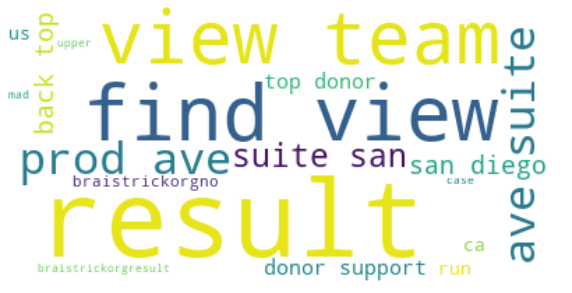

In [39]:
wordcloud_figure(vocab)

# Topic modeling

In [40]:
from modeling.my_topicmodeling import lda_topic_model

In [41]:
lda_model, doc_term_matrix, dictionary = lda_topic_model(list_lemmatized)

[(0, '0.110*"result" + 0.045*"find" + 0.045*"prod" + 0.045*"ave" + 0.045*"fundraistrick" + 0.045*"view" + 0.045*"back" + 0.045*"san" + 0.045*"suite" + 0.045*"donor"'), (1, '0.040*"fundraistrick" + 0.040*"prod" + 0.040*"top" + 0.040*"team" + 0.040*"support" + 0.040*"suite" + 0.040*"san" + 0.040*"ave" + 0.040*"view" + 0.040*"diego"'), (2, '0.040*"fundraistrick" + 0.040*"prod" + 0.040*"top" + 0.040*"team" + 0.040*"support" + 0.040*"suite" + 0.040*"san" + 0.040*"ave" + 0.040*"view" + 0.040*"diego"'), (3, '0.040*"result" + 0.040*"fundraistrick" + 0.040*"view" + 0.040*"suite" + 0.040*"support" + 0.040*"top" + 0.040*"san" + 0.040*"diego" + 0.040*"back" + 0.040*"find"'), (4, '0.040*"fundraistrick" + 0.040*"prod" + 0.040*"top" + 0.040*"team" + 0.040*"support" + 0.040*"suite" + 0.040*"san" + 0.040*"ave" + 0.040*"view" + 0.040*"diego"'), (5, '0.040*"result" + 0.040*"run" + 0.040*"all" + 0.040*"us" + 0.040*"th" + 0.040*"top" + 0.040*"no" + 0.040*"braistrickorg" + 0.040*"support" + 0.040*"team"'), 

In [ ]:
import pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)

In [ ]:
vis

# Other models